## Numerical experiment on the accuracy of the RK4 method


In [1]:
import numpy as np

In [2]:
# RK4
def RungeKutta4(f, t0, tend, u, N):
    h = (tend-t0)/N
    result = []
    time = []
    result.append(u)
    time.append(t0)
    t = t0
    for i in range(1, N+1):
        k1 = f(t, u)
        k2 = f(t+h/2, u+h*k1/2)
        k3 = f(t+h/2, u+h*k2/2)
        k4 = f(t+h, u+h*k3)
        u = u + h*(k1+2*k2+2*k3+k4)/6
        t = t+h
        result.append(u)
        time.append(t)
    return h,  np.array(time), np.array(result)


In [3]:
# define the right side fucntion for the system
def f(t, u):
    eps = 0.1
    f = np.zeros(2)
    f[0] = u[1]
    f[1] = -eps*(u[0]**2-1)*u[1]-u[0]
    return f

In [4]:
t0 = 0.0
tend = 1
N = [1, 2, 4, 8]
u = np.array([1.0, 0.0])
h, time, result = RungeKutta4(f, t0, tend, u, 64)
y1 = result[-1][0]
u_N = []
step =[]
e = []
for k in range(0, len(N)):
    h, time , result = RungeKutta4(f, t0, tend, u, N[k])
    u_N.append(result[-1][0])
    dif = u_N[k]- y1
    e.append(dif)
    step.append(h)


In [5]:
print("\n           N ", end="  ")
print("             h ", end=" ")
print("           u_1N", end="  ")
print("           u_1N-y(1)", end = " ")
print("\n         ___________________________________________________________", end= " ")
print()
for i in range(0, len(N)):
    print("{:12d}".format(N[i]), end=" ")
    print("{:16.4f}".format(step[i]), end=" ")
    print("{:17.4f}".format(u_N[i]), end=" ")
    print("{:19.6f}".format(e[i]), end = " ")
    print()


           N                h             u_1N             u_1N-y(1) 
         ___________________________________________________________ 
           1           1.0000            0.5380            0.001603 
           2           0.5000            0.5367            0.000265 
           4           0.2500            0.5364            0.000022 
           8           0.1250            0.5364            0.000002 


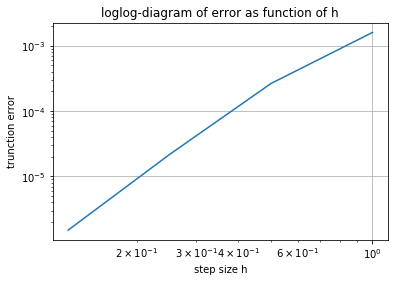

In [6]:
import matplotlib.pyplot as plt
plt.loglog(step, e)
plt.xlabel('step size h')
plt.ylabel('trunction error')
plt.title('loglog-diagram of error as function of h')
plt.grid()
plt.show()
